In [1]:
using Random, LinearAlgebra, Statistics, Distributions, StatsBase
using BAT, DensityInterface, IntervalSets
using ValueShapes
using PyPlot
using ArraysOfArrays
using Optimisers

using Revise
using EuclidianNormalizingFlows

# Test densities:

In [ ]:
n_dims = 2

distribution = BAT.FunnelDistribution(n=n_dims)
# distribution = BAT.MvNormal(n_dims,1)

prior = NamedTupleDist(
    x = repeat([-50.0 .. 50.0], n_dims),
);

truth_int = 0.0 #-log(10)*n_dims*2

In [ ]:
n_dims = 2

distribution = BAT.GaussianShell(n=n_dims, r=5);


prior = NamedTupleDist(
    x = repeat([-50.0 .. 50.0], n_dims),
);

truth_int = 0.0 #-log(10)*n_dims*2

In [ ]:
n_dims = 2

Σ = 0.10 .* [0.1 0.1; 0.1 0.184]
distribution = BAT.MvNormal([-1, 2],Σ)
# distribution = BAT.MvNormal(n_dims,Σ)


prior = NamedTupleDist(
    x = repeat([-50.0 .. 50.0], n_dims),
);

truth_int = 0.0 #-log(10)*n_dims*2

In [2]:
distribution = MixtureModel(MvNormal[
          MvNormal([0, 0], 0.5 * [1 0; 0 1]),
          MvNormal([-3.0, -2.0], 0.1 * [1 0; 0 0.1]),
          MvNormal([2.0, 4.0], 0.1 * [0.1 0; 0 0.4]),
          MvNormal([3.0, 1.0], 0.2 * [0.2 0; 0 1.3]),
          MvNormal([-2.0, 4.0], 0.1 * [1 0; 0 1])], [0.3, 0.1, 0.1, 0.3, 0.2]);

# IID Samples: 

In [3]:
nsmpls = 10^5

100000

In [4]:
samples = BAT.bat_sample(
    distribution, 
    BAT.IIDSampling(nsamples=nsmpls)
).result; 

┌ Info: Initializing new RNG of type Random123.Philox4x{UInt64, 10}
└ @ BAT /Users/vhafych/.julia/packages/BAT/m4PAB/src/algotypes/bat_default.jl:44


In [5]:
samples

DensitySampleVector, StructArray with 5 columns and 100000 rows:
      v                       logd       weight  info     aux
    ┌────────────────────────────────────────────────────────────
 1  │ [-2.02228, 4.12957]     -1.23115   1       nothing  nothing
 2  │ [0.255366, 0.746018]    -2.97046   1       nothing  nothing
 3  │ [-1.39116, 0.772684]    -4.88106   1       nothing  nothing
 4  │ [-1.49339, 3.82884]     -2.57449   1       nothing  nothing
 5  │ [0.0953952, -1.04338]   -3.44644   1       nothing  nothing
 6  │ [-0.186248, 0.295507]   -2.47072   1       nothing  nothing
 7  │ [-3.13746, -1.95111]    -0.900591  1       nothing  nothing
 8  │ [3.11471, 0.541609]     -1.32743   1       nothing  nothing
 9  │ [3.02365, 1.20667]      -0.848002  1       nothing  nothing
 10 │ [2.15967, 3.84275]      -1.81222   1       nothing  nothing
 11 │ [-0.121625, -0.770955]  -2.95787   1       nothing  nothing
 12 │ [2.97165, 1.74436]      -1.83443   1       nothing  nothing
 13 │ [-3.08171

In [6]:
smpls_flat = flatview(unshaped.(samples.v))

2×100000 Matrix{Float64}:
 -2.02228  0.255366  -1.39116   -1.49339  …  2.82555  2.82661   3.37
  4.12957  0.746018   0.772684   3.82884     1.40237  0.703407  1.18956

In [7]:
# smpls_flat = smpls_flat .- mean(smpls_flat, dims=2)
# v = std(smpls_flat, dims=2)
# smpls_flat = smpls_flat ./ v

In [8]:
# 1/prod(v)

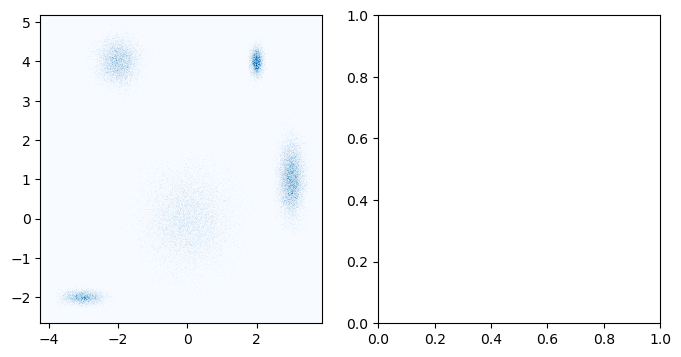

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [-4.2485050765507175, -4.232233537526403, -4.215961998502089, -4.199690459477774, -4.18341892045346, -4.167147381429146, -4.150875842404831, -4.134604303380517, -4.118332764356203, -4.102061225331888  …  3.7408205843876425, 3.7570921234119563, 3.773363662436271, 3.7896352014605856, 3.8059067404849003, 3.822178279509215, 3.838449818533528, 3.8547213575578425, 3.870992896582157, 3.8872644356064727], [-2.657519301345705, -2.6418544966616406, -2.6261896919775767, -2.6105248872935123, -2.594860082609448, -2.5791952779253835, -2.5635304732413196, -2.547865668557255, -2.5322008638731908, -2.5165360591891264  …  5.0338997985298555, 5.04956460321392, 5.065229407897984, 5.080894212582049, 5.096559017266113, 5.112223821950177, 5.127888626634242, 5.143553431318306, 5.159218236002371, 5.174883040686434], PyObject <matplotlib.collections.QuadMesh object at 0x7fad88e05220>)

In [9]:
fig, ax = plt.subplots(1,2,  figsize=(8,4))

ax[1].hist2d(smpls_flat[1,:], smpls_flat[2,:], weights=samples.weight, 500, cmap="Blues")
# ax[1].scatter(x[1,:], x[2,:], s=0.1, alpha=0.2, color="C0")
# ax[1].set_xlim(-4, 4)
# ax[1].set_ylim(-10, 10)

# ax[2].hist2d(y[1,:], y[2,:], 100, cmap="Blues")
# ax[2].scatter(y[1,:], y[2,:], s=0.1, alpha=0.5, color="C0")

In [ ]:
# s = 0.5

# mask = Bool[prod(abs.(smpls_flat) .< s, dims=1)...]
# N = sum(samples.weight)
# n = sum(samples.weight[mask])
# v = (2*s)^2

# # i = mean(1 ./ exp.(samples.logd[mask]), weights(samples.weight[mask]))

# i = N*v / (n*mean(1 ./ exp.(samples.logd[mask]), weights(samples.weight[mask])))

In [11]:
# fig, ax = plt.subplots(1,2,  figsize=(8,4))

# ax[1].hist2d(smpls_flat[1,:], smpls_flat[2,:], weights=samples.weight, 500, cmap="Blues")
# # ax[1].set_xlim(-4, 4)
# # ax[1].set_ylim(-10, 10)

# ax[2].hist2d(smpls_flat[1,mask], smpls_flat[2,mask], weights=samples.weight[mask], 50, cmap="Blues")
# # ax[2].set_xlim(-4, 4)
# # ax[2].set_ylim(-10, 10)

# Spline transformation: 

In [12]:
nparams = 15
nparams_2 = 5

initial_trafo =  TrainableRQSpline(ones(2, nparams), ones(2, nparams), ones(2, nparams-1)) 
# ∘ TrainableRQSpline(ones(2, nparams_2), ones(2, nparams_2), ones(2, nparams_2-1))


optimizer = ADAGrad()
smpls = nestedview(smpls_flat)
nbatches = 100
nepochs = 4

r = EuclidianNormalizingFlows.optimize_whitening(smpls, initial_trafo, optimizer, nbatches = nbatches, nepochs = nepochs, shuffle_samples=true);

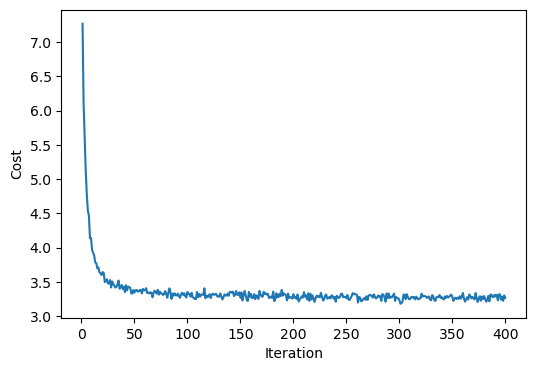

PyObject Text(0.5, 24.0, 'Iteration')

In [13]:
fig, ax = plt.subplots(1,1,  figsize=(6,4))

ax.plot(1:length(r.negll_history), r.negll_history)
ax.set_ylabel("Cost")
ax.set_xlabel("Iteration")

In [14]:
smpls_transformed = r.result(smpls_flat)

2×100000 Matrix{Float64}:
 -0.851737  -0.00232486  -0.519281  …  0.725955   0.727622  2.2114
  1.38313   -0.126763    -0.106498     0.325821  -0.159036  0.196488

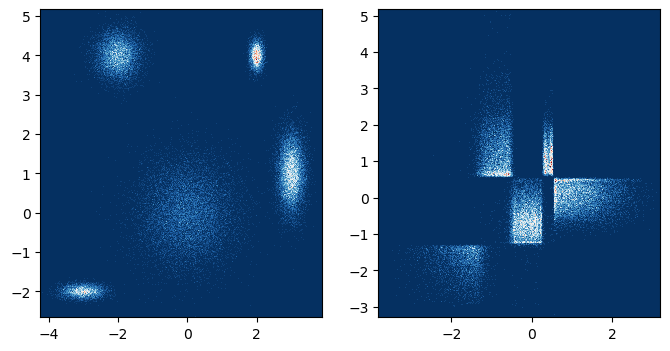

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [-3.8182430075378533, -3.8042144745027286, -3.790185941467604, -3.7761574084324794, -3.7621288753973547, -3.74810034236223, -3.7340718093271055, -3.720043276291981, -3.7060147432568558, -3.691986210221731  …  3.0697667127083563, 3.0837952457434805, 3.0978237787786056, 3.11185231181373, 3.125880844848855, 3.13990937788398, 3.153937910919104, 3.167966443954229, 3.1819949769893534, 3.196023510024478], [-3.2904622984068785, -3.273531607728692, -3.2566009170505055, -3.2396702263723185, -3.222739535694132, -3.2058088450159454, -3.188878154337759, -3.1719474636595724, -3.1550167729813854, -3.138086082303199  …  5.022506824582755, 5.039437515260942, 5.056368205939129, 5.073298896617316, 5.090229587295501, 5.107160277973688, 5.124090968651875, 5.141021659330062, 5.157952350008249, 5.174883040686434], PyObject <matplotlib.collections.QuadMesh object at 0x7fad8a6c9f40>)

In [15]:
fig, ax = plt.subplots(1,2,  figsize=(8,4))

ax[1].hist2d(smpls_flat[1,:], smpls_flat[2,:], weights=samples.weight, 500, cmap="RdBu_r")
# ax[1].set_xlim(-4, 4)
# ax[1].set_ylim(-10, 10)

# ax[1].set_xlim(-5, 5)
# ax[1].set_ylim(-5, 5)

ax[2].hist2d(smpls_transformed[1,:], smpls_transformed[2,:], 500, cmap="RdBu_r")
# ax[2].set_xlim(-5, 5)
# ax[2].set_ylim(-5, 5)

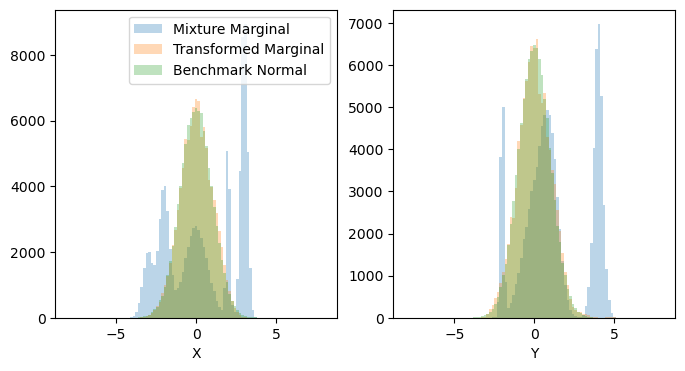

PyObject Text(0.5, 24.0, 'Y')

In [16]:
fig, ax = plt.subplots(1,2,  figsize=(8,4))

bins = range(-8, 8, 100)
ax[1].hist(smpls_flat[1,:], weights=samples.weight, bins=bins, alpha=0.3, label="Mixture Marginal")
ax[1].hist(smpls_transformed[1,:], weights=samples.weight, bins=bins, alpha=0.3, label="Transformed Marginal")
ax[1].hist(rand(Normal(), 10^5),  bins=bins, alpha=0.3, label="Benchmark Normal")
ax[1].legend()
ax[1].set_xlabel("X")

ax[2].hist(smpls_flat[2,:], bins=bins, weights=samples.weight, alpha=0.3)
ax[2].hist(smpls_transformed[2,:], bins=bins, weights=samples.weight, alpha=0.3)
ax[2].hist(rand(Normal(), 10^5),  bins=bins, alpha=0.3, label="Truth");
ax[2].set_xlabel("Y")